# Skyline Problem: Vertical Line Sweep Algo

In [40]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

In [41]:
import heapq as hq
def getSkyline(buildings):
    '''
    Purpose:
        Compute the contour line of a list of rectangle buildings that are all grounded on y=0, and
        return the skyline of the buildings.
    Parameters:
        buildings : a list of lists where buildings[i] = [lefti, righti, heighti] where
                         - lefti is the x coordinate of the left edge of the ith building.
                         - righti is the x coordinate of the right edge of the ith building.
                         - heighti is the height of the ith building.
    Return:
        a list of "key points" sorted by their x-coordinate in the form [[x1,y1],[x2,y2],...]. 
        Each key point is the left endpoint of some horizontal segment in the skyline except the 
        last point in the list, which always has a y-coordinate 0 and is used to mark the skyline's 
        termination where the rightmost building ends.
    '''

    tallq = [] 
    res = [] 
    prev = -1 

    for b in buildings:
        # check previous stopping points 
        while tallq and tallq[0][1] <= b[0]:
            stoppingPt = tallq[0][1]
            height = tallq[0][0]
            hq.heappop(tallq)
            while tallq and (tallq[0][1] <= stoppingPt):
                hq.heappop(tallq)
            if tallq and tallq[0][0] != height:
                res.append([stoppingPt, -tallq[0][0]])
            elif not tallq:
                res.append([stoppingPt, 0])
                
        # consider adding the current pt (collinear case included)
        if not (tallq and (tallq[0][0] == -b[2] or (tallq[0][0] < -b[2] and tallq[0][1] > b[0]))):
            if res and res[-1][0] == b[0]:
                res[-1][1] = max(b[2], res[-1][1])
                if len(res) >= 2 and res[-2][1] == res[-1][1]:
                    res = res[:-1]
            else:
                res.append([b[0], b[2]])

        # maintain invarients: tallest building live beyond this point
        while tallq and tallq[0][1] == b[0]:
            hq.heappop(tallq)

        hq.heappush(tallq, [-b[2], b[1]])
        prev = b[0]

    # check the rest stopping points 
    while tallq:
        stoppingPt = tallq[0][1]
        height = tallq[0][0]
        hq.heappop(tallq)
        while tallq and tallq[0][1] <= stoppingPt:
            hq.heappop(tallq)
        if tallq and tallq[0][0] != height:
            res.append([stoppingPt, -tallq[0][0]])
        elif not tallq:
            res.append([stoppingPt, 0])
        prev = stoppingPt

    # remove duplicates 
    distinctRes = []
    prev = [-1, -1]
    for i in range(len(res)):
        if res[i][1] != prev[1] and res[i][0] != prev[0]:
            distinctRes.append(res[i])
        if res[i][0] == prev[0]:
            distinctRes[-1][1] = max(distinctRes[-1][1], res[i][1])
        prev = distinctRes[-1]

    return res

In [42]:
def drawRectangles(buildings, xRange, yRange, ax):
    '''
    Purpose: 
        Plot the outline of the given rectangle buildings
    Parameters:
        buildlings : a list of lists - same as in getSkyline function
        xRange : the max x-coord shown on canvas
        yRange : the max y-coord shown on canvas
        ax : the subplot axes 
    Return:
        None
    '''
    N = len(buildings)
    xs = []
    ys = []
    ws = []
    hs = []
    for b in buildings:
        xs.append(b[0])
        ys.append(0)
        ws.append(b[1] - b[0])
        hs.append(b[2])
    vs = np.random.randn(N)
    normal = pl.Normalize(vs.min(), vs.max())
    colors = pl.cm.jet(normal(vs))

    for x,y,w,h,c in zip(xs,ys,ws,hs,colors):
        rect = pl.Rectangle((x,y),w,h,color=c,fill=None)  #remove the fill=None to show colors filled in rectangles
        ax.add_patch(rect)

    ax.set_xlim(0,xRange)  #320
    ax.set_ylim(0,yRange)  #60


In [43]:
def drawContour(res, xRange, yRange, ax):
    '''
    Purpose:
        Plot the computed skyline of the buildings
    Parameters:
        res : the skyline that the getSkyline function would return (as a list of sorted points)
        xRange : the width of the canvas
        yRange : the height of the canvas
        ax : the subplot axes 
    Return:
        None
    '''
    print(res)
    plt.xlim(0, xRange)
    plt.ylim(0, yRange)
    color = '#000000'
    
    prevx = 0
    prevy = 0

    for c in after:
        ax.plot(c[0], c[1], marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red")
        
        # draw a horizontal  line 
        xs = [prevx, c[0]]
        ys = [prevy, prevy]
        ax.plot(xs, ys, c=color)

        # draw a vertical line
        x_values = [c[0], c[0]]
        y_values = [prevy, c[1]]
        ax.plot(x_values, y_values, c=color)
        prevx, prevy = c[0], c[1]


In [74]:
import random
def randomBuildings(N, width, height, prev):
    '''
    Purpose:
        Randomly generate a list of N buildings with the constraints
    Parameters:
        N : the number of buildings
        width : max-width of each rectangle
        prev : smallest starting point of 1st rectangle
    Return:
        A list of buildings that's ready to be fed into the getSkyline function
    '''
    xs,ys,ws = [],[],[]

    for i in range(prev, N * width, width):
        x = random.randint(prev,i)
        xs.append(x)
        ys.append(random.randint(i, i+width))
        ws.append(random.randint(5, height))
        prev = x

    return [list(ele) for ele in list(zip(xs, ys, ws))]

## Run the program

[[10, 16], [23, 39], [44, 35], [52, 0], [55, 21], [73, 47], [107, 38], [125, 49], [169, 32], [204, 39], [232, 38], [263, 0], [265, 42], [270, 7], [303, 0]]


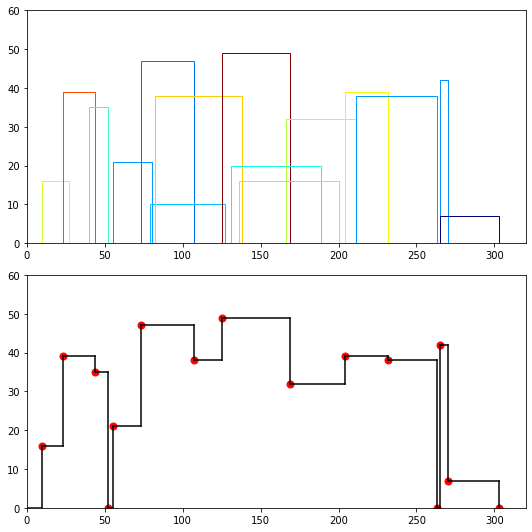

In [83]:
# Randomly generate rectangles
N = 15        # number of rectangles
width = 20    # max-width of each rectangle
height = 50   # max-height of each rectangle
prev = 10     # smallest starting point of 1st rectangle
xRange = (N+1)*width  # canvas x range
yRange = 60           # canvas y range
buildings = randomBuildings(N, width, height, prev)

# Create a canvas
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(2)

# Plot the randomly generated rectangles
drawRectangles(buildings, xRange, yRange, ax1)

# Compute the skyline
after = getSkyline(buildings)

# Plot the skyline
drawContour(after, xRange, yRange, ax2)
plt.show()

In [79]:
myTree = segTree(xRange)
addBuildings(myTree, buildings)
countBuildingsAt(myTree, 36)

4


In [ ]:
N = 15        # number of rectangles
width = 20    # max-width of each rectangle
height = 50   # max-height of each rectangle
prev = 10     # smallest starting point of 1st rectangle
xRange = (N+1)*width  # canvas x range
yRange = 60           # canvas y range
buildings = randomBuildings(N, width, height, prev)

while True:
    command = input("Enter a command (Enter \"help\" to see what commands are available):")
    if command == "stop":
        break
    elif command == "help":
        print("stop - Exit the program \nrandom - Randomly generate a given number of buildings\nplot - Plot the randomly generated buildings and its skyline\nbuild - build a segment tree on the current set of buildings\nquery - Query about the number of buildings at a given point")
    elif command == "plot":
        # Randomly generate rectangles
        N = 15        # number of rectangles
        width = 20    # max-width of each rectangle
        height = 50   # max-height of each rectangle
        prev = 10     # smallest starting point of 1st rectangle
        xRange = (N+1)*width  # canvas x range
        yRange = 60           # canvas y range
        buildings = randomBuildings(N, width, height, prev)

        # Create a canvas
        plt.rcParams["figure.figsize"] = [9.50, 9.50]
        plt.rcParams["figure.autolayout"] = True
        fig, (ax1, ax2) = plt.subplots(2)

        # Plot the randomly generated rectangles
        drawRectangles(buildings, xRange, yRange, ax1)

        # Compute the skyline
        after = getSkyline(buildings)

        # Plot the skyline
        drawContour(after, xRange, yRange, ax2)
        plt.show()
    elif command == "build":
        myTree = segTree(xRange)
        addBuildings(myTree, buildings)
        print("Tree built")
    elif command == "query":
        if myTree:
            print("The range you could query on is [1,%d]" % xRange)
            n = int(input("Enter the index you'd like to query on: "))
            res = myTree.query(n)
#             res = countBuildingsAt(myTree, n)
            print(res)
#             print("The number of buildings on %d is %d\n" % (n, res))
    else:
        print("Invalid command")

Enter a command (Enter "help" to see what commands are available):build
Tree built
Enter a command (Enter "help" to see what commands are available):query
The range you could query on is [1,320]
Enter the index you'd like to query on: 99
None


Enter a command (Enter "help" to see what commands are available):plot
[[2, 10], [3, 15], [7, 12], [12, 0], [15, 10], [20, 8], [24, 0]]


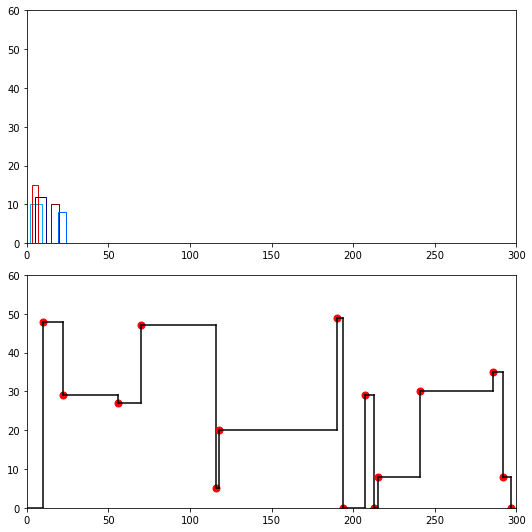

Enter a command (Enter "help" to see what commands are available):stop


In [39]:
def input_commands():
    # default settings
    
#     buildings = randomBuildings(N, width, height, prev)
    myTree = None
    
    while True:
        command = input("Enter a command (Enter \"help\" to see what commands are available):")
        if command == "stop":
            break
        elif command == "help":
            print("stop - Exit the program \nrandom - Randomly generate a given number of buildings\nplot - Plot the randomly generated buildings and its skyline\nbuild - build a segment tree on the current set of buildings\nquery - Query about the number of buildings at a given point")
#         elif command == "random":
#             N = int(input("Enter the number of buildings: "))
#             buildings = randomBuildings(N, width, height, prev)
#             xRange = (N+1) * width
#             print(buildings)
        elif command == "plot":
            N = 15        # number of rectangles
            width = 20    # max-width of each rectangle
            height = 50   # max-height of each rectangle
            prev = 10     # smallest starting point of 1st rectangle
            xRange = 300  # canvas x range
            yRange = 60   # canvas y range
            buildings = [[2,9,10],[3,7,15],[5,12,12],[15,20,10],[19,24,8]]

            # Create a canvas
            plt.rcParams["figure.figsize"] = [7.50, 7.50]
            plt.rcParams["figure.autolayout"] = True
            fig, (ax1, ax2) = plt.subplots(2)

            # Compute the skyline
            after = getSkyline(buildings)
            # Plot the randomly generated rectangles
            drawRectangles(buildings, xRange, yRange, ax1)
            # Plot the skyline
            drawContour(after, xRange, yRange, ax2)
            plt.show()
        elif command == "build":
            myTree = segTree(N)
            print("Tree built")
        elif command == "query":
            if myTree:
                print("The range you could query on is [1,%d]", N)
                n = int(input("Enter the index you'd like to query on: "))
                print("The number of buildings on %d is %d\n", (n, myTree.query(n)))
        else:
            print("Invalid command")

input_commands()

# Segment tree: number of buildings across a line

In [102]:
import math
class segTree:
    def __init__(self, N):
        '''
        Initialize the segment tree that could efficiently store ranges from 1 to N
        Parameter:
            N - the upper limit of input intervals
        '''
        self.N = N
        self.leavesNum = 2 ** (int(math.sqrt(N)) + 1)
        self.nodesNum = self.leavesNum * 2 - 1
        self.arrSize = self.nodesNum + 1
        
        self.arr   = [0 for i in range(self.arrSize)] # start with index 1
        self.left  = [0 for i in range(self.arrSize)] # left endpoint
        self.right = [0 for i in range(self.arrSize)] # right endpoint
        self.lazy  = [0 for i in range(self.arrSize)] # for lazy propagation
    
        # initialize the full binary tree which is represented by arrays
        self.initInternalNodes(1, self.leavesNum, 1)
    
    def initInternalNodes(self, left, right, curr):
        '''
        Initialize the ranges for each internal nodes and leaf nodes in the segment tree
        Parameters:
            left - smallest inclusive endpoint in subtree
            right - largest inclusive endpoint in subtree
            curr - the index of the node in the array
        Return:
            None
        '''
        self.left[curr] = left 
        self.right[curr] = right
        if left < right:
            pred = (right-left+1) // 2
            self.initInternalNodes(left, left+pred-1, curr*2)
            self.initInternalNodes(left+pred, right, curr*2+1)
    
    def incrementRange(self, start, end):
        '''
        Increment the count of [start, end] by one
        Parameters:
            start - the inclusive starting point of the range
            end - the inclusive ending point of the range
        Return:
            None
        '''
        if start < 1 or end > self.N:
            print("out of range error")
        else:
            self.update(start, end, 1)
    
    def update(self, start, end, curr):
        '''
        Private helper function of incrementRange
        '''
        if start == self.left[curr] and end == self.right[curr]: # base case: interval covers entire subtree
            self.lazy[curr] += 1  
        elif start >= self.left[curr*2+1]:                       # recursive case: interval only overlaps with right subtree
            self.update(start, end, curr*2+1)
        elif end <= self.right[curr*2]:                          # recursive case: interval only overlaps with left subtree
            self.update(start, end, curr*2)
        else:                                                    # recursive case: interval overlaps with both subtrees
            self.update(start, self.right[curr*2], curr*2)     
            self.update(self.left[curr*2+1], end, curr*2+1)
    
    def query(self, n):
        '''
        Return the count value of a given position
        Parmeters:
            n - the query index 
        Return:
            the count associated with the index
        '''
        if n < 1 or n > self.N:
            print("out of range error")
        else:
            return self.search(n, 1)
    
    def search(self, n, curr):
        '''
        Private helper function of query 
        '''
        if self.left[curr] == n and self.right[curr] == n:  # base case: reach the leaf
            self.arr[curr] += self.lazy[curr]
            self.lazy[curr] = 0
            res = self.arr[curr]
            return res
        if self.lazy[curr] != 0:       # propagate the lazy count
            self.lazy[curr*2+1] += self.lazy[curr]
            self.lazy[curr*2] += self.lazy[curr]
            self.lazy[curr] = 0
        if n <= self.right[curr*2]:    # search left subtree
            self.search(n, curr*2)
        elif n >= self.left[curr*2+1]: # search right subtree
            self.search(n, curr*2+1)
        
    def printTree(self):
        '''
        Private helper function for debugging
        '''
        for i in range(self.arrSize):
            if self.lazy[i]:
                print(self.left[i], self.right[i], self.lazy[i])


In [103]:
def addBuilding(segTree, building):
    segTree.incrementRange(building[0], building[1])

def addBuildings(segTree, buildings):
    for building in buildings:
        addBuilding(segTree, building)

def countBuildingsAt(segTree, queryPt):
    return segTree.query(queryPt)

In [100]:
myTree = segTree(20)
# myTree.printTree()
myTree.incrementRange(2, 19)
# myTree.printTree()
myTree.incrementRange(3, 9)
# myTree.printTree()
myTree.incrementRange(8, 13)
# myTree.printTree()
myTree.query(9)

# myTree.printTree()
# myTree.update(1, 3)
# myTree.printTree()

3
